In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
from pathlib import Path
import pandas as pd
import copy

from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
EXP_ROOT = Path('~/CXR_RELATED/chexpert_save')
COMPETITION_TASKS = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion"]
SEMI_RATIOS = [0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1]
SEMI_POWER = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
# SEMI_RATIOS = [0.00390625, 0.015625, 0.0625, 0.25, 1]
# SEMI_POWER = [ -8, -6, -4, -2, 0]

In [7]:
COMBINATIONS = [(False, False, 'full'),     # scratch, baseline, full

                 (True, False, 'full'),      # imagenet, baseline, full
                 (True, True, 'full'),       # imagenet, moco, full
                 (False, True, 'full'),      # scratch, moco, full

                 (True, False, 'last'),      # imagenet, baseline, last
                 (True, True, 'last'),       # imagenet, moco, last
                 (False, True, 'last'),      # scratch, moco, last
                ]


In [4]:
def collect_one_exp(model, moco, imagenet, fine_tune, semi_ratio, learning_rate):
    
    # JBY: This is due to scripting error, handle correctly later one
    if learning_rate is not None:
        folder_name = f'{model}-{"moco" if moco else "baseline"}-{"wt" if imagenet else "wo"}-{fine_tune}-{semi_ratio}-{learning_rate}'
    else:
        folder_name = f'{model}-{"moco" if moco else "baseline"}-{"wt" if imagenet else "wo"}-{fine_tune}-{semi_ratio}'
    score_csv_path = EXP_ROOT / folder_name / 'test.pth.tar' /\
                        'final' / 'results' / \
                        'test' / 'scores.csv'
    
    print(score_csv_path)
    
    score_df = pd.read_csv(score_csv_path)
    return score_df

def get_competition_only(df):
    df = df[df['Tasks'].isin(COMPETITION_TASKS)]
    df = df[df['Metrics'] == 'AUROC']
    
    df = df.set_index('Tasks')
    return df

In [5]:
def collect_all():
    
    columns = ['Model', 'With Moco', 'ImageNet Pretraining', 'Layers of Fine Tuning']
    columns = columns + SEMI_RATIOS
    all_results = {lr: {t: [] for t in COMPETITION_TASKS} for lr in LEARNING_RATES}
    
    # only comparing densenet121
    for model in MODELS:
        
        for lr in LEARNING_RATES:
            
            for combo in COMBINATIONS:
                imagenet, moco, ft = combo
                starter = [model,
                         f'{"moco" if moco else "baseline"}',
                         f'{"wt" if imagenet else "wo"}',
                         f'{ft}']
                row = {t: copy.deepcopy(starter)  for t in COMPETITION_TASKS}

                for semi_ratio in SEMI_RATIOS:

                    try:
                        exp_result = collect_one_exp(model, moco, imagenet, ft, semi_ratio, lr)
                        exp_result = get_competition_only(exp_result)
                        for t in COMPETITION_TASKS:
                            row[t].append(exp_result.loc[t]['Values'])
                    except:
                        for t in COMPETITION_TASKS:
                            row[t].append(None)
                        print(f'Unable to fine experiment {(model, moco, imagenet, ft, semi_ratio)}')

                for t in COMPETITION_TASKS:
                    all_results[lr][t].append(copy.deepcopy(row[t]))
    
    compare_full_result = {lr: {t: pd.DataFrame(all_results[lr][t], columns=columns) \
                                for t in COMPETITION_TASKS} for lr in LEARNING_RATES}
    
    return compare_full_result

# DenseNet 121

In [6]:
MODELS = ['densenet121']
LEARNING_RATES = [None, 5e-5, 2.5e-5, 6e-6]

In [8]:
full_result = collect_all()

~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.001953125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.00390625/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.0078125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.015625/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.03125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.0625/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.25/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', False, False, 'full', 0.25)
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.5/t

~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.0625/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.25/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.5/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-1/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.001953125-5e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.00390625-5e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.0078125-5e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-baseline-wo-full-0.015625-5e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/de

~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.015625-5e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'last', 0.015625)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.03125-5e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'last', 0.03125)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.0625-5e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'last', 0.0625)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.125-5e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'last', 0.125)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.25-5e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'last', 0.25)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-last-0.5-5e-05/test.pth.tar/final/results/test/score

~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-0.03125-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-0.0625-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-0.125-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-0.25-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-0.5-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wt-full-1-6e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-full-0.001953125-6e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False, 'full', 0.001953125)
~/CXR_RELATED/chexpert_save/densenet121-moco-wo-full-0.00390625-6e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('densenet121', True, False

 === Learning Rate None ===
	=== Results for Atelectasis @lr=None ===
	=== Results for Cardiomegaly @lr=None ===
	=== Results for Consolidation @lr=None ===
	=== Results for Edema @lr=None ===
	=== Results for Pleural Effusion @lr=None ===
 === Learning Rate 5e-05 ===
	=== Results for Atelectasis @lr=5e-05 ===
	=== Results for Cardiomegaly @lr=5e-05 ===
	=== Results for Consolidation @lr=5e-05 ===
	=== Results for Edema @lr=5e-05 ===
	=== Results for Pleural Effusion @lr=5e-05 ===
 === Learning Rate 2.5e-05 ===
	=== Results for Atelectasis @lr=2.5e-05 ===
	=== Results for Cardiomegaly @lr=2.5e-05 ===
	=== Results for Consolidation @lr=2.5e-05 ===
	=== Results for Edema @lr=2.5e-05 ===
	=== Results for Pleural Effusion @lr=2.5e-05 ===
 === Learning Rate 6e-06 ===
	=== Results for Atelectasis @lr=6e-06 ===
	=== Results for Cardiomegaly @lr=6e-06 ===
	=== Results for Consolidation @lr=6e-06 ===
	=== Results for Edema @lr=6e-06 ===
	=== Results for Pleural Effusion @lr=6e-06 ===


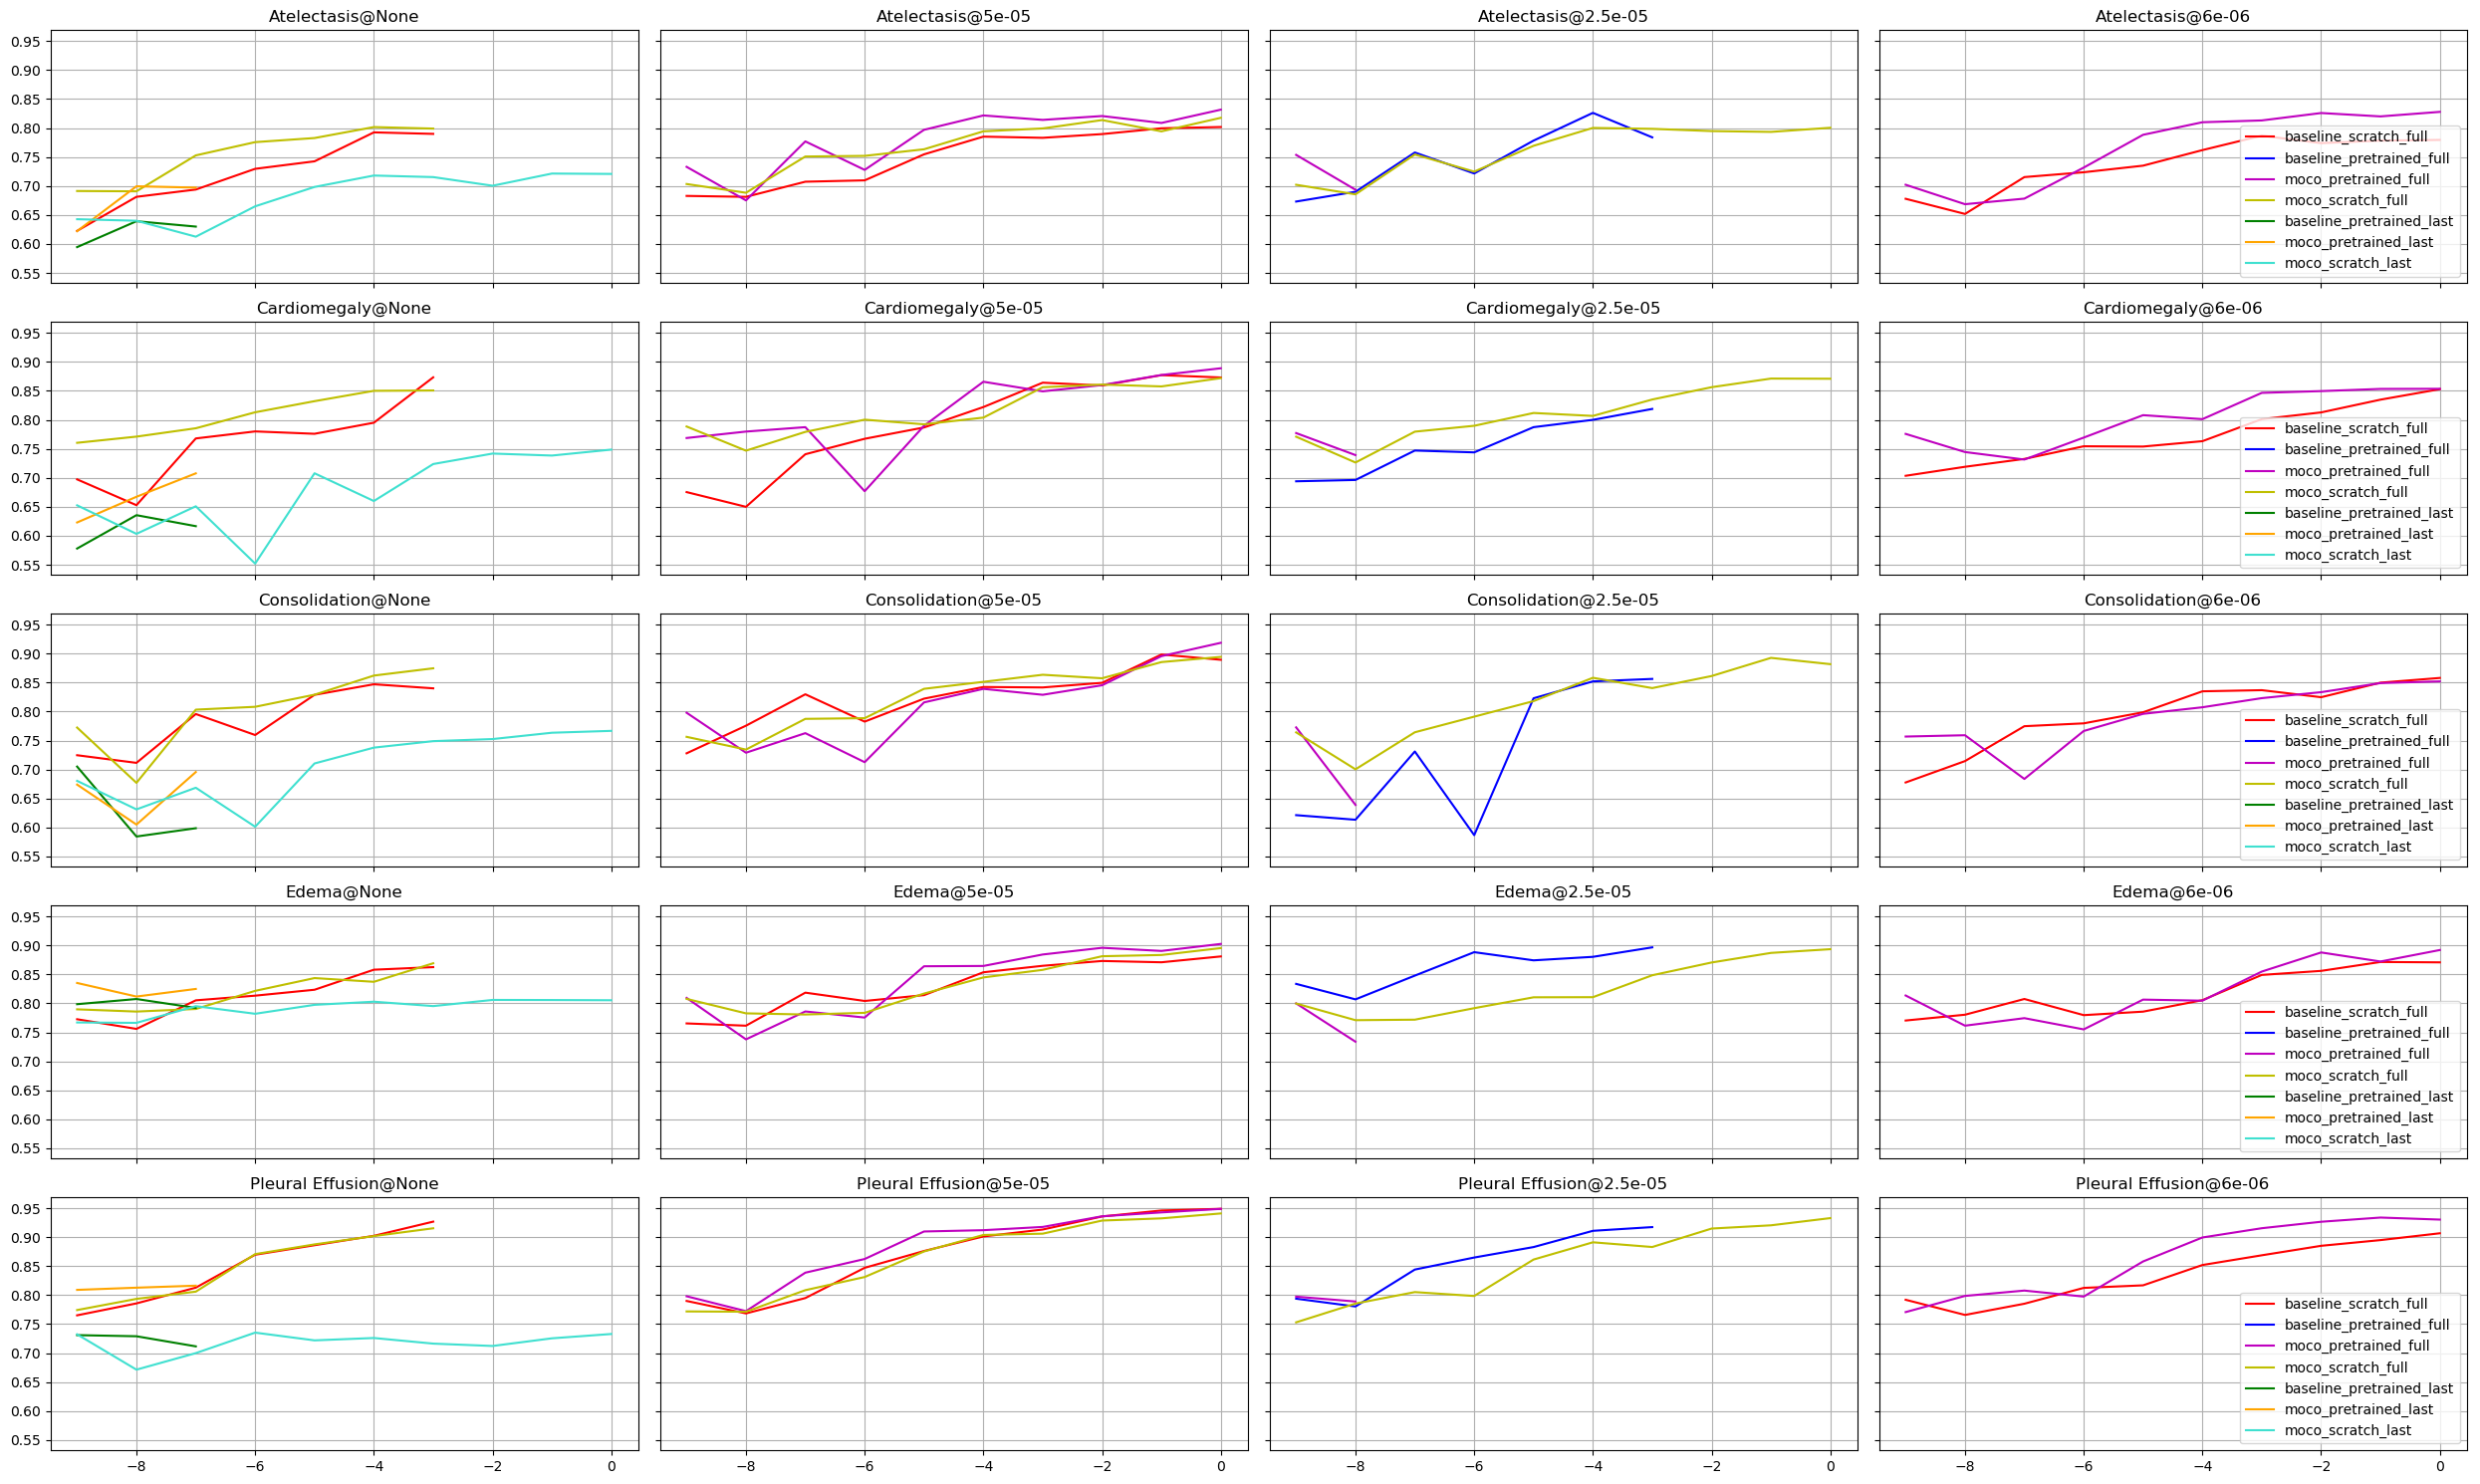

In [9]:
COLORS = ['r', 'b', 'm', 'y', 'g', 'orange', 'turquoise']
fig, ax_list = plt.subplots(nrows=len(COMPETITION_TASKS), ncols=len(LEARNING_RATES),
                            sharex=True, sharey=True,
                            figsize=(25, 15), dpi=100)

for l, lr in enumerate(LEARNING_RATES):
    print(f' === Learning Rate {lr} ===')
    
    for i, t in enumerate(COMPETITION_TASKS):
        print(f'\t=== Results for {t} @lr={lr} ===')
        #display(full_result[lr][COMPETITION_TASKS[i]])
        gsheet = full_result[lr][COMPETITION_TASKS[i]][SEMI_RATIOS]
        gsheet = gsheet.style.hide_index()
        # display(gsheet)
        
        ax = ax_list[i][l]
        
        # Only comparing densenet121 so it's okay to force locations
        for model in MODELS:
            model_df = full_result[lr][COMPETITION_TASKS[i]][full_result[lr][COMPETITION_TASKS[i]]['Model'] == model]

            # plt.figure(figsize=(10,3), dpi=100)
        
            counter = 0
            for j, row in model_df.iterrows():
                data = row[SEMI_RATIOS]

                with_moco = row['With Moco']
                imagenet_pretrained = row['ImageNet Pretraining']
                imagenet_pretrained = 'pretrained' if imagenet_pretrained == 'wt' else 'scratch'
                fine_tuning = row['Layers of Fine Tuning']

                ax.plot(SEMI_POWER, data, color=COLORS[counter], label=f'{with_moco}_{imagenet_pretrained}_{fine_tuning}')
                counter += 1

            ax.set_title(f'{COMPETITION_TASKS[i]}@{lr}')
            ax.grid()
            
            if l == len(LEARNING_RATES) - 1:
                ax.legend()
    
    plt.tight_layout()

# ResNet 18

In [12]:
MODELS = ['resnet18']
LEARNING_RATES = [None, 5e-7, 1e-6, 4e-6, 1e-5]

In [13]:
full_result = collect_all()

~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.001953125/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.00390625/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.00390625)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.0078125/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.0078125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.015625/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.015625)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.03125/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.03125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.0625/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.0625)
~/CXR_

~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.001953125-5e-07/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.001953125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.00390625-5e-07/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.00390625)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.0078125-5e-07/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.0078125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.015625-5e-07/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.015625)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.03125-5e-07/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.03125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.0625-5e-07/test.pth.tar/final/results/test/scores.csv

~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.125-1e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.25-1e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.5-1e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.5)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-1-1e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 1)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wt-full-0.001953125-1e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, True, 'full', 0.001953125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wt-full-0.00390625-1e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, True, 'full', 0.00390625)

~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.0078125-4e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.0078125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.015625-4e-06/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.03125-4e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.03125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.0625-4e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.0625)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.125-4e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full', 0.125)
~/CXR_RELATED/chexpert_save/resnet18-baseline-wo-full-0.25-4e-06/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', False, False, 'full

~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.0078125-1e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.0078125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.015625-1e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.03125-1e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.03125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.0625-1e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.125-1e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'full', 0.125)
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.25-1e-05/test.pth.tar/final/results/test/scores.csv
~/CXR_RELATED/chexpert_save/resnet18-moco-wt-full-0.5-1e-05/test.pth.tar/final/results/test/scores.csv
Unable to fine experiment ('resnet18', True, True, 'fu

 === Learning Rate None ===
	=== Results for Atelectasis @lr=None ===
	=== Results for Cardiomegaly @lr=None ===
	=== Results for Consolidation @lr=None ===
	=== Results for Edema @lr=None ===
	=== Results for Pleural Effusion @lr=None ===
 === Learning Rate 5e-07 ===
	=== Results for Atelectasis @lr=5e-07 ===
	=== Results for Cardiomegaly @lr=5e-07 ===
	=== Results for Consolidation @lr=5e-07 ===
	=== Results for Edema @lr=5e-07 ===
	=== Results for Pleural Effusion @lr=5e-07 ===
 === Learning Rate 1e-06 ===
	=== Results for Atelectasis @lr=1e-06 ===
	=== Results for Cardiomegaly @lr=1e-06 ===
	=== Results for Consolidation @lr=1e-06 ===
	=== Results for Edema @lr=1e-06 ===
	=== Results for Pleural Effusion @lr=1e-06 ===
 === Learning Rate 4e-06 ===
	=== Results for Atelectasis @lr=4e-06 ===
	=== Results for Cardiomegaly @lr=4e-06 ===
	=== Results for Consolidation @lr=4e-06 ===
	=== Results for Edema @lr=4e-06 ===
	=== Results for Pleural Effusion @lr=4e-06 ===
 === Learning Rate 1e-

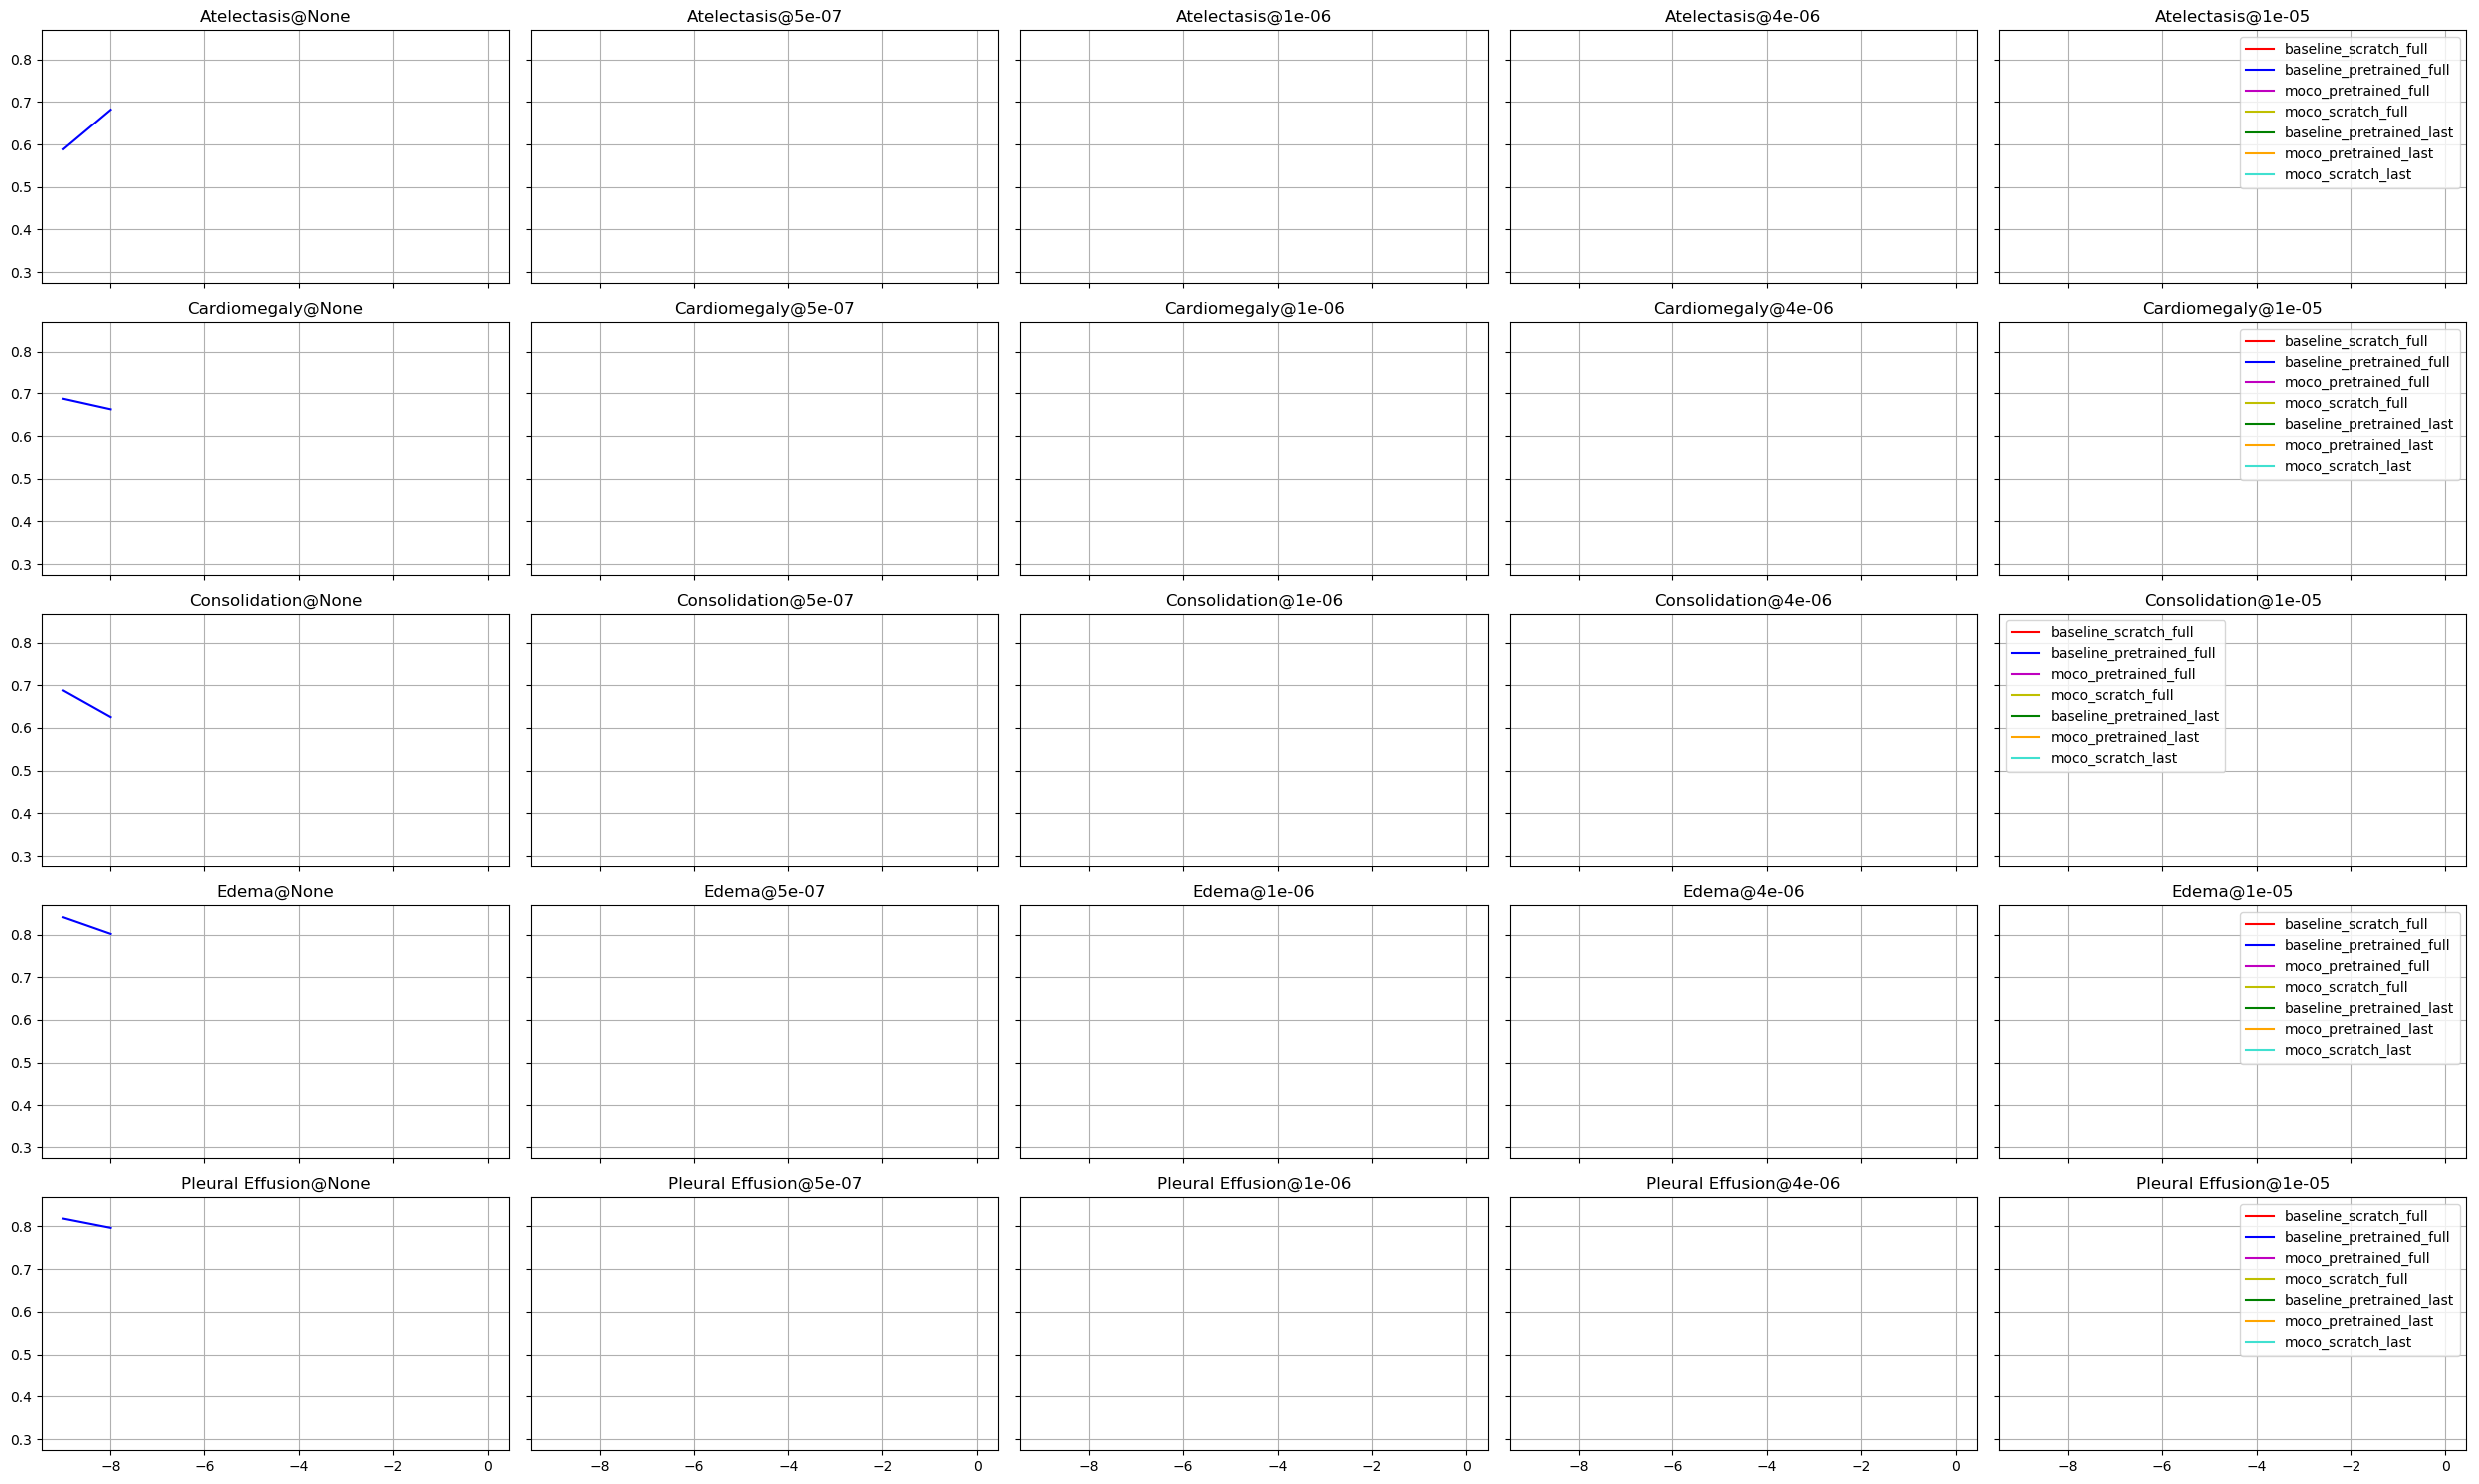

In [14]:
COLORS = ['r', 'b', 'm', 'y', 'g', 'orange', 'turquoise']
fig, ax_list = plt.subplots(nrows=len(COMPETITION_TASKS), ncols=len(LEARNING_RATES),
                            sharex=True, sharey=True,
                            figsize=(25, 15), dpi=100)

for l, lr in enumerate(LEARNING_RATES):
    print(f' === Learning Rate {lr} ===')
    
    for i, t in enumerate(COMPETITION_TASKS):
        print(f'\t=== Results for {t} @lr={lr} ===')
        #display(full_result[lr][COMPETITION_TASKS[i]])
        gsheet = full_result[lr][COMPETITION_TASKS[i]][SEMI_RATIOS]
        gsheet = gsheet.style.hide_index()
        # display(gsheet)
        
        ax = ax_list[i][l]
        
        # Only comparing densenet121 so it's okay to force locations
        for model in MODELS:
            model_df = full_result[lr][COMPETITION_TASKS[i]][full_result[lr][COMPETITION_TASKS[i]]['Model'] == model]

            # plt.figure(figsize=(10,3), dpi=100)
        
            counter = 0
            for j, row in model_df.iterrows():
                data = row[SEMI_RATIOS]

                with_moco = row['With Moco']
                imagenet_pretrained = row['ImageNet Pretraining']
                imagenet_pretrained = 'pretrained' if imagenet_pretrained == 'wt' else 'scratch'
                fine_tuning = row['Layers of Fine Tuning']

                ax.plot(SEMI_POWER, data, color=COLORS[counter], label=f'{with_moco}_{imagenet_pretrained}_{fine_tuning}')
                counter += 1

            ax.set_title(f'{COMPETITION_TASKS[i]}@{lr}')
            ax.grid()
            
            if l == len(LEARNING_RATES) - 1:
                ax.legend()
    
    plt.tight_layout()